<h1>Data Wrangling,  Descriptive Statistical Analysis & Model Development</h1>

## Table of contents
* [Data Preprocessing & Exploratory Data Analysis (EDA)](#EDA)
* [Model Development](#Development)
* [Model Evaluation](#Evaluation)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Read the online file by the URL provides above, and assign it to variable "df"
other_path = "https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"
df = pd.read_csv(other_path, header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [3]:
df.columns

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25],
           dtype='int64')

In [4]:
# create headers list
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
print("headers\n", headers)

headers
 ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']


In [5]:
df.columns = headers
#df = pd.read_csv(filename, names = headers)
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [6]:
df.to_csv("Auto")

## **Data Preprocessing & Exploratory Data Analysis (EDA)**<a name="EDA"></a>

### **Descriptive Statistical Analysis**

In [7]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [9]:
df.info

<bound method DataFrame.info of      symboling normalized-losses         make fuel-type aspiration  \
0            3                 ?  alfa-romero       gas        std   
1            3                 ?  alfa-romero       gas        std   
2            1                 ?  alfa-romero       gas        std   
3            2               164         audi       gas        std   
4            2               164         audi       gas        std   
..         ...               ...          ...       ...        ...   
200         -1                95        volvo       gas        std   
201         -1                95        volvo       gas      turbo   
202         -1                95        volvo       gas        std   
203         -1                95        volvo    diesel      turbo   
204         -1                95        volvo       gas      turbo   

    num-of-doors   body-style drive-wheels engine-location  wheel-base  ...  \
0            two  convertible          rwd      

In [10]:
df.duplicated().sum()

0

In [11]:
df.nunique()

symboling              6
normalized-losses     52
make                  22
fuel-type              2
aspiration             2
num-of-doors           3
body-style             5
drive-wheels           3
engine-location        2
wheel-base            53
length                75
width                 44
height                49
curb-weight          171
engine-type            7
num-of-cylinders       7
engine-size           44
fuel-system            8
bore                  39
stroke                37
compression-ratio     32
horsepower            60
peak-rpm              24
city-mpg              29
highway-mpg           30
price                187
dtype: int64

In [12]:
len(df['city-mpg'].unique())

29

In [13]:
len(df['fuel-type'].unique())

2

#### **Value counts**

Value-counts is a good way of understanding how many units of each characteristic/variable we have. Apply the "value_counts" method on the column 'drive-wheels'. It is importent to remember that the method "value_counts" only works on Pandas series, not Pandas Dataframes. As a result, include one bracket "df['drive-wheels']" not two brackets "df[['drive-wheels']]".

In [14]:
df['drive-wheels'].value_counts()

fwd    120
rwd     76
4wd      9
Name: drive-wheels, dtype: int64

In [15]:
df['drive-wheels'].value_counts().to_frame()

,drive-wheels
fwd,120
rwd,76
4wd,9


Save the results to the dataframe "drive_wheels_counts" and rename the column 'drive-wheels' to 'value_counts'.

In [16]:
drive_wheels_counts = df['drive-wheels'].value_counts().to_frame()
drive_wheels_counts.rename(columns={'drive-wheels': 'value_counts'}, inplace=True)
drive_wheels_counts

,value_counts
fwd,120
rwd,76
4wd,9


 Rename the index to 'drive-wheels':

In [17]:
drive_wheels_counts.index.name = 'drive-wheels'
drive_wheels_counts

,value_counts
drive-wheels,
fwd,120
rwd,76
4wd,9


Repeat the above process for the variable 'engine-location'.

In [18]:
# engine-location as variable
engine_loc_counts = df['engine-location'].value_counts().to_frame()
engine_loc_counts.rename(columns={'engine-location': 'value_counts'}, inplace=True)
engine_loc_counts.index.name = 'engine-location'
engine_loc_counts

,value_counts
engine-location,
front,202
rear,3


Examining the value counts of the engine location would not be a good predictor variable for the price. This is because only three cars with a rear engine against 198 with an engine in the front are available, hence this result is skewed. Thus, it is not able to draw any conclusions about the engine location.

In [19]:
df['fuel-type'].value_counts()

gas       185
diesel     20
Name: fuel-type, dtype: int64

In [20]:
df['fuel-type'].value_counts().idxmax()

'gas'

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


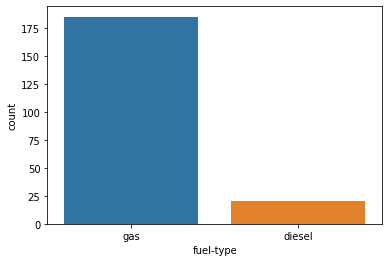

In [21]:
sns.countplot(df['fuel-type']);

#### **Summary statistics**

In [22]:
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [23]:
# describe all the columns in "df" 
df.describe(include = "all")

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205,205,205,205,205,205,205,205,205.000000,...,205.000000,205,205,205,205.000000,205,205,205.000000,205.000000,205
unique,NaN,52,22,2,2,3,5,3,2,NaN,...,NaN,8,39,37,NaN,60,24,NaN,NaN,187
top,NaN,?,toyota,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,3.62,3.40,NaN,68,5500,NaN,NaN,?
freq,NaN,41,32,185,168,114,96,120,202,NaN,...,NaN,94,23,20,NaN,19,37,NaN,NaN,4
mean,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,NaN,NaN,10.142537,NaN,NaN,25.219512,30.751220,NaN
std,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,NaN,NaN,3.972040,NaN,NaN,6.542142,6.886443,NaN
min,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,NaN,NaN,7.000000,NaN,NaN,13.000000,16.000000,NaN
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,NaN,NaN,8.600000,NaN,NaN,19.000000,25.000000,NaN
50%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,NaN,NaN,9.000000,NaN,NaN,24.000000,30.000000,NaN
75%,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,NaN,NaN,9.400000,NaN,NaN,30.000000,34.000000,NaN


### **Missing Data**
The above table shows '?' as values in some columns. Explore further to reveal all the columns containing this as value. 

In [24]:
df[["normalized-losses"]].max()

normalized-losses    ?
dtype: object

In [25]:
df[["normalized-losses"]].value_counts()

normalized-losses
?                    41
161                  11
91                    8
150                   7
104                   6
134                   6
128                   6
103                   5
102                   5
168                   5
65                    5
74                    5
85                    5
94                    5
95                    5
122                   4
118                   4
93                    4
106                   4
148                   4
83                    3
154                   3
101                   3
125                   3
137                   3
115                   3
153                   2
108                   2
110                   2
113                   2
89                    2
87                    2
119                   2
81                    2
145                   2
164                   2
197                   2
194                   2
192                   2
188                   2
129                   

In [26]:
df[["bore", "stroke"]].max()

bore      ?
stroke    ?
dtype: object

In [27]:
df[["stroke"]].value_counts()

stroke
3.40      20
3.15      14
3.03      14
3.23      14
3.39      13
2.64      11
3.35       9
3.29       9
3.46       8
3.58       6
3.50       6
3.41       6
3.07       6
3.27       6
3.11       6
3.19       6
3.52       5
3.64       5
3.54       4
3.86       4
3.47       4
?          4
2.90       3
3.90       3
2.19       2
3.10       2
3.08       2
2.80       2
2.68       2
4.17       2
2.07       1
3.16       1
3.12       1
2.87       1
2.76       1
2.36       1
3.21       1
dtype: int64

In [28]:
df[["bore"]].value_counts()

bore
3.62    23
3.19    20
3.15    15
3.03    12
2.97    12
3.46     9
3.31     8
3.43     8
3.78     8
3.27     7
2.91     7
3.05     6
3.39     6
3.58     6
3.54     6
3.01     5
3.70     5
3.35     4
?        4
3.74     3
3.17     3
3.59     3
3.33     2
3.24     2
3.47     2
3.50     2
3.13     2
3.94     2
3.80     2
3.63     2
2.68     1
2.92     1
3.76     1
3.61     1
2.99     1
3.08     1
3.34     1
3.60     1
2.54     1
dtype: int64

In [29]:
df[["price"]].max()

price    ?
dtype: object

In [30]:
df[["price"]].value_counts()

price
?        4
9279     2
5572     2
6229     2
6692     2
        ..
18280    1
18344    1
18399    1
18420    1
35550    1
Length: 187, dtype: int64

In [31]:
df[["peak-rpm"]].max()

peak-rpm    ?
dtype: object

In [32]:
df[["peak-rpm"]].value_counts()

peak-rpm
5500        37
4800        36
5000        27
5200        23
5400        13
6000         9
5800         7
4500         7
5250         7
4200         5
4150         5
4750         4
4350         4
5100         3
4400         3
5900         3
4250         3
6600         2
?            2
4900         1
5300         1
4650         1
5600         1
5750         1
dtype: int64

In [33]:
df[df['normalized-losses'] == '?']

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?
14,1,?,bmw,gas,std,four,sedan,rwd,front,103.5,...,164,mpfi,3.31,3.19,9.0,121,4250,20,25,24565
15,0,?,bmw,gas,std,four,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182,5400,16,22,30760
16,0,?,bmw,gas,std,two,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182,5400,16,22,41315
17,0,?,bmw,gas,std,four,sedan,rwd,front,110.0,...,209,mpfi,3.62,3.39,8.0,182,5400,15,20,36880


Replace '?' to null value (NaN) so that it can be removed systematically. 

In [34]:
df.replace('?', np.NaN, inplace=True)

In [35]:
df.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

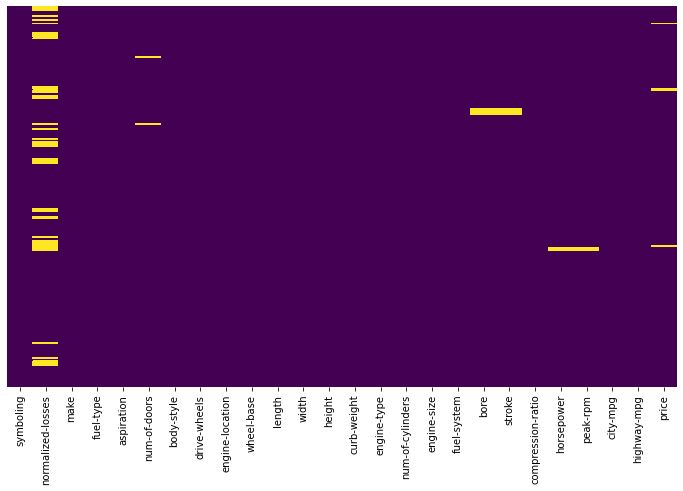

In [36]:
plt.figure(figsize=(12, 7))
sns.heatmap(df.isnull(), yticklabels=False,cbar=False,cmap='viridis');

#### **Removing null values.**

In [37]:
# calculate the mean vaule for "stroke" column
avg_stroke = df["stroke"].astype("float").mean(axis = 0)
# replace NaN by mean value in "stroke" column
df["stroke"].replace(np.nan, avg_stroke, inplace = True)

# calculate the mean vaule for "normalized-losses" column
avg_norm_loss = df["normalized-losses"].astype("float").mean(axis=0)
# replace NaN by mean value in "normalized-losses" column
df["normalized-losses"].replace(np.nan, avg_norm_loss, inplace=True)

# calculate the mean vaule for "bore" column
avg_bore=df['bore'].astype('float').mean(axis=0)
# replace NaN by mean value in "bore" column
df["bore"].replace(np.nan, avg_bore, inplace=True)

# calculate the mean vaule for "horsepower" column
avg_bore=df['horsepower'].astype('float').mean(axis=0)
# replace NaN by mean value in "horsepower" column
df["horsepower"].replace(np.nan, avg_bore, inplace=True)

# calculate the mean vaule for "peak-rpm" column
avg_bore=df['peak-rpm'].astype('float').mean(axis=0)
# replace NaN by mean value in "peak-rpm" column
df["peak-rpm"].replace(np.nan, avg_bore, inplace=True)

In [38]:
df['num-of-doors'].value_counts().idxmax()

'four'

In [39]:
#replace the missing 'num-of-doors' values by the most frequent 
df["num-of-doors"].replace(np.nan, "four", inplace=True)

# simply drop whole row with NaN in "price" column
df.dropna(subset=["price"], axis=0, inplace=True)

# reset index, because we droped two rows
#df.reset_index(drop=True, inplace=True)

### **Correct data format**
List the data types for each column

In [40]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

#### **Convert data types to proper format**
Some columns are not of the correct data type. Numerical variables should have type 'float' or 'int', and variables with strings such as categories should have type 'object'. For example, 'bore' and 'stroke' variables are numerical values that describe the engines, so they should  be of the type 'float' or 'int'; however, they are shown as type 'object'. These data types have to be converted into a proper format for each column using the "astype()" method.

In [41]:
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[["price"]] = df[["price"]].astype("float")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")

In [42]:
df.dtypes

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

Finally a cleaned dataset with no missing values is obtained and all data in its proper format.

### **Descriptive Data Analysis**

#### **Grouping**

The "groupby" method groups data by different categories. The data is grouped based on one or several variables and analysis is performed on the individual groups.

In [43]:
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [44]:
df['drive-wheels'].value_counts()

fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64

In [45]:
df_wheels = df.groupby(['drive-wheels'],as_index=False).mean()
df_wheels

,drive-wheels,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,peak-rpm,city-mpg,highway-mpg,price
0,4wd,0.500000,99.125000,96.487500,170.562500,64.875000,55.825000,2553.625000,107.500000,3.423750,2.832500,8.512500,4837.500000,24.000000,27.875000,10241.000000
1,fwd,0.949153,115.627119,96.461864,168.998305,65.082203,53.544915,2270.728814,109.101695,3.200000,3.291186,9.939153,5171.616431,28.152542,34.076271,9244.779661
2,rwd,0.706667,134.466667,102.717333,182.774667,67.266667,53.896000,3004.186667,156.906667,3.526387,3.248156,10.694667,5062.666667,20.626667,25.653333,19757.613333


It seems rear-wheel drive vehicles are, on average, the most expensive, while 4-wheel and front-wheel are approximately the same in price.

Grouping can be done with multiple variables. For example, group by both 'drive-wheels' and 'body-style'. This groups the dataframe by the unique combinations 'drive-wheels' and 'body-style'. 

In [46]:
df_wheels = df.groupby(['drive-wheels','body-style'],as_index=False).mean()
df_wheels[['drive-wheels','body-style', 'price']]

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


This grouped data is much easier to visualize when it is made into a pivot table. A pivot table is like an Excel spreadsheet, with one variable along the column and another along the row. Convert the dataframe to a pivot table using the method "pivot " to create a pivot table from the groups.

In this case, leave the drive-wheel variable as the rows of the table, and pivot body-style to become the columns of the table:

In [47]:
df_wheels = df_wheels[['drive-wheels','body-style','price']].pivot(index='drive-wheels',columns='body-style')
df_wheels

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [48]:
df_wheels = df_wheels.fillna(0) #fill missing values with 0
df_wheels

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

Heat map to visualize the relationship between drive-wheels vs Price.

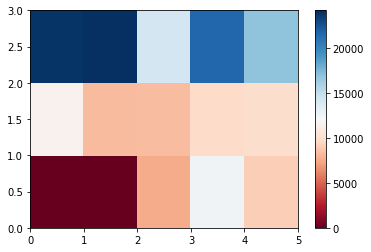

In [49]:
plt.pcolor(df_wheels, cmap='RdBu')
plt.colorbar()
plt.show()

The heatmap plots the target variable (price) proportional to colour with respect to the variables 'drive-wheel' and 'body-style' in the vertical and horizontal axis respectively. This allows one to visualize how the price is related to 'drive-wheel' and 'body-style'.

Change the default labels to convey the necessary useful information. 

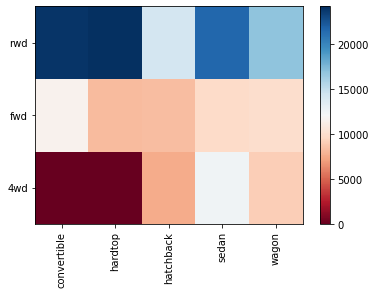

In [50]:
fig, ax = plt.subplots()
im = ax.pcolor(df_wheels, cmap='RdBu')

#label names
row_labels = df_wheels.columns.levels[1]
col_labels = df_wheels.index

#move ticks and labels to the center
ax.set_xticks(np.arange(df_wheels.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(df_wheels.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

In [51]:
df_body = df.groupby(['body-style','drive-wheels'],as_index=False).mean()
df_body[['body-style','drive-wheels', 'price']]

,body-style,drive-wheels,price
0,convertible,fwd,11595.000000
1,convertible,rwd,23949.600000
2,hardtop,fwd,8249.000000
3,hardtop,rwd,24202.714286
4,hatchback,4wd,7603.000000
5,hatchback,fwd,8396.387755
6,hatchback,rwd,14337.777778
7,sedan,4wd,12647.333333
8,sedan,fwd,9811.800000
9,sedan,rwd,21711.833333


In [52]:
df_body = df_body[['body-style','drive-wheels', 'price']].pivot(index='body-style',columns='drive-wheels')
df_body

price                            
drive-wheels           4wd           fwd           rwd
body-style                                            
convertible            NaN  11595.000000  23949.600000
hardtop                NaN   8249.000000  24202.714286
hatchback      7603.000000   8396.387755  14337.777778
sedan         12647.333333   9811.800000  21711.833333
wagon          9095.750000   9997.333333  16994.222222

In [53]:
df_body = df_body.fillna(0) #fill missing values with 0
df_body

price                            
drive-wheels           4wd           fwd           rwd
body-style                                            
convertible       0.000000  11595.000000  23949.600000
hardtop           0.000000   8249.000000  24202.714286
hatchback      7603.000000   8396.387755  14337.777778
sedan         12647.333333   9811.800000  21711.833333
wagon          9095.750000   9997.333333  16994.222222

Heat map to visualize the relationship between Body Style vs Price.

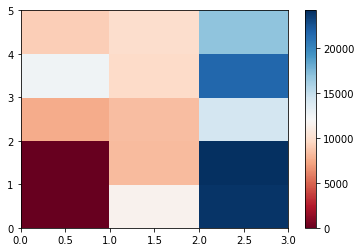

In [54]:
plt.pcolor(df_body, cmap='RdBu')
plt.colorbar()
plt.show()

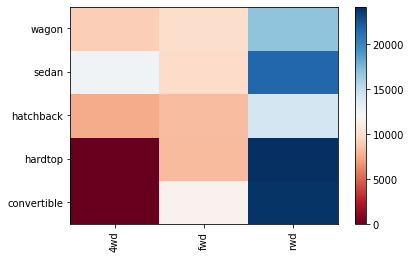

In [55]:
fig, ax = plt.subplots()
im = ax.pcolor(df_body, cmap='RdBu')

#label names
row_labels = df_body.columns.levels[1]
col_labels = df_body.index

#move ticks and labels to the center
ax.set_xticks(np.arange(df_body.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(df_body.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

<h3>Data Standardization</h3>
<p>Data is usually collected from different agencies with different formats.
(Data Standardization is also a term for a particular type of data normalization, where the mean value is subtracted from the original value and divided by the standard deviation)</p>
    
<b>What is Standardization?</b>
<p>Standardization is the process of transforming data into a common format which allows the researcher to make the meaningful comparison.</p>

<b>Example</b>
<p>Transform mpg to L/100km:</p>
<p>In the dataset, the fuel consumption columns "city-mpg" and "highway-mpg" are represented by mpg (miles per gallon) unit. For developing an application in a country that accept the fuel consumption with L/100km standard <b>data transformation</b> to transform mpg into L/100km, should be applied</p>
<p>The formula for unit conversion is<p>
L/100km = 235 / mpg
<p>Many mathematical operations can be directly done in Pandas.</p>

In [56]:
# Convert mpg to L/100km by mathematical operation (235 divided by mpg)
df['city-L/100km'] = 235/df["city-mpg"]

# check the transformed data 
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556


In [57]:
# transform mpg to L/100km by mathematical operation (235 divided by mpg)
df["highway-mpg"] = 235/df["highway-mpg"]
# rename column name from "highway-mpg" to "highway-L/100km"
df.rename(columns={'highway-mpg':'highway-L/100km'}, inplace=True)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,8.703704,13495.0,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,8.703704,16500.0,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000.0,19,9.038462,16500.0,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500.0,24,7.833333,13950.0,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500.0,18,10.681818,17450.0,13.055556


<h3>Data Normalization</h3>

<b>Why normalization?</b>
<p>Normalization is the process of transforming values of several variables into a similar range. Typical normalizations include scaling the variable so the variable average is 0, scaling the variable so the variance is 1, or scaling variable so the variable values range from 0 to 1</p>

<b>Example</b>
<p>To demonstrate normalization, scale the columns "length", "width" and "height"</p>
<p><b>Target:</b> would like to Normalize those variables so their value ranges from 0 to 1.</p>
<p><b>Approach:</b> replace original value by (original value)/(maximum value)</p>

In [58]:
df[['length','width','height']].head()

,length,width,height
0,168.8,64.1,48.8
1,168.8,64.1,48.8
2,171.2,65.5,52.4
3,176.6,66.2,54.3
4,176.6,66.4,54.3


In [59]:
# replace (original value) by (original value)/(maximum value)
df['length'] = df['length']/df['length'].max()
df['width'] = df['width']/df['width'].max()
df['height'] = df['height']/df['height'].max()
df[['length','width','height']].head()

,length,width,height
0,0.811148,0.890278,0.816054
1,0.811148,0.890278,0.816054
2,0.822681,0.909722,0.876254
3,0.848630,0.919444,0.908027
4,0.848630,0.922222,0.908027


"length", "width" and "height" are normalized in the range of [0,1].

<h3 id="binning">Binning</h3>
<b>Why binning?</b>
<p>
    Binning is a process of transforming continuous numerical variables into discrete categorical 'bins', for grouped analysis.
</p>
<b>Example:</b>
<p>In our dataset, "horsepower" is a real valued variable ranging from 48 to 288, it has 57 unique values. What if we only care about the price difference between cars with high horsepower, medium horsepower, and little horsepower (3 types)? Can we rearrange them into three ‘bins' to simplify analysis?</p>
<p>We will use the Pandas method 'cut' to segment the 'horsepower' column into 3 bins </p>
<p>To obtain 3 bins of equal size bandwidth use numpy's <code>linspace(start_value, end_value, numbers_generated</code> function.</p>
<p>To include the minimum value of horsepower set start_value=min(df["horsepower"]).</p>
<p>To include the maximum value of horsepower set end_value=max(df["horsepower"]).</p>
<p>To build 3 bins of equal length, there should be 4 dividers, so numbers_generated=4.</p>
<p>A bin array, with a minimum value to a maximum value, with bandwidth calculated above will be built. The bins will be values used to determine when one bin ends and another begins.</p>

In [60]:
df["horsepower"]=df["horsepower"].astype(int, copy=True)
bins = np.linspace(min(df["horsepower"]), max(df["horsepower"]), 4)
bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

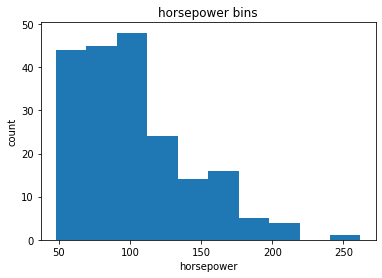

In [61]:
plt.hist(df["horsepower"])
# set x/y labels and plot title
plt.xlabel("horsepower")
plt.ylabel("count")
plt.title("horsepower bins");

 **Set group  names:**

In [62]:
group_names = ['Low', 'Medium', 'High']
df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=group_names, include_lowest=True )
df[['horsepower','horsepower-binned']].head(20)

,horsepower,horsepower-binned
0,111,Low
1,111,Low
2,154,Medium
3,102,Low
4,115,Low
5,110,Low
6,110,Low
7,110,Low
8,140,Medium
10,101,Low


In [63]:
df["horsepower-binned"].value_counts()

Low       153
Medium     43
High        5
Name: horsepower-binned, dtype: int64

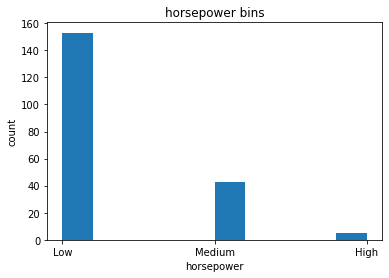

In [64]:
plt.hist(df["horsepower-binned"])
# set x/y labels and plot title
plt.xlabel("horsepower")
plt.ylabel("count")
plt.title("horsepower bins");

<h3>Bins visualization</h3>
Normally, a histogram is used to visualize the distribution of bins we created above. 

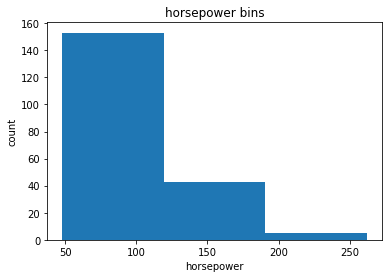

In [65]:
# draw historgram of attribute "horsepower" with bins = 3
plt.hist(df["horsepower"], bins = 3)
plt.xlabel("horsepower")
plt.ylabel("count")
plt.title("horsepower bins");

<h3>Indicator variable (or dummy variable)</h3>
<b>What is an indicator variable?</b>
<p>
    An indicator variable (or dummy variable) is a numerical variable used to label categories. They are called 'dummies' because the numbers themselves don't have inherent meaning. 
</p>

<b>Why we use indicator variables?</b>
<p>
    So we can use categorical variables for regression analysis in the later modules.
</p>
<b>Example</b>
<p>
    We see the column "fuel-type" has two unique values, "gas" or "diesel". Regression doesn't understand words, only numbers. To use this attribute in regression analysis, we convert "fuel-type" into indicator variables.
</p>

<p>
    We will use the panda's method 'get_dummies' to assign numerical values to different categories of fuel type. 
</p>

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   symboling          201 non-null    int64   
 1   normalized-losses  201 non-null    int64   
 2   make               201 non-null    object  
 3   fuel-type          201 non-null    object  
 4   aspiration         201 non-null    object  
 5   num-of-doors       201 non-null    object  
 6   body-style         201 non-null    object  
 7   drive-wheels       201 non-null    object  
 8   engine-location    201 non-null    object  
 9   wheel-base         201 non-null    float64 
 10  length             201 non-null    float64 
 11  width              201 non-null    float64 
 12  height             201 non-null    float64 
 13  curb-weight        201 non-null    int64   
 14  engine-type        201 non-null    object  
 15  num-of-cylinders   201 non-null    object  
 16  engine-s

In [67]:
fuel_type = pd.get_dummies(df["fuel-type"])
fuel_type.head()

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [68]:
# merge data frame "df" and "dummy_variable_1" 
df = pd.concat([df, fuel_type], axis=1)

# drop original column "fuel-type" from "df"
df.drop("fuel-type", axis = 1, inplace=True)
df.drop("city-mpg", axis = 1, inplace=True)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,stroke,compression-ratio,horsepower,peak-rpm,highway-L/100km,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,2.68,9.0,111,5000.0,8.703704,13495.0,11.190476,Low,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,2.68,9.0,111,5000.0,8.703704,16500.0,11.190476,Low,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,3.47,9.0,154,5000.0,9.038462,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,3.40,10.0,102,5500.0,7.833333,13950.0,9.791667,Low,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,3.40,8.0,115,5500.0,10.681818,17450.0,13.055556,Low,0,1


The last two columns are now the indicator variable representation of the fuel-type variable. It's all 0s and 1s now.

In [69]:
# get indicator variables of aspiration and assign it to data frame "dummy_variable_2"
aspiration = pd.get_dummies(df["aspiration"])
aspiration.head(2)

,std,turbo
0,1,0
1,1,0


In [70]:
# merge data frame "df" and "dummy_variable_1" 
df = pd.concat([df, aspiration], axis=1)

# drop original column "fuel-type" from "df"
df.drop("aspiration", axis = 1, inplace=True)
df.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,horsepower,peak-rpm,highway-L/100km,price,city-L/100km,horsepower-binned,diesel,gas,std,turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,111,5000.0,8.703704,13495.0,11.190476,Low,0,1,1,0
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,111,5000.0,8.703704,16500.0,11.190476,Low,0,1,1,0
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,154,5000.0,9.038462,16500.0,12.368421,Medium,0,1,1,0
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,102,5500.0,7.833333,13950.0,9.791667,Low,0,1,1,0
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,115,5500.0,10.681818,17450.0,13.055556,Low,0,1,1,0


### **Correlation and Causation**
<p><b>Correlation</b>: a measure of the extent of interdependence between variables.</p>

<p><b>Causation</b>: the relationship between cause and effect between two variables.</p>

<p>It is important to know the difference between these two and that correlation does not imply causation. Determining correlation is much simpler  the determining causation as causation may require independent experimentation.</p>
<p><b>Pearson Correlation</b></p>
<p>The Pearson Correlation measures the linear dependence between two variables X and Y.</p>
<p>The resulting coefficient is a value between -1 and 1 inclusive, where:</p>
<ul>
    <li><b>1</b>: Total positive linear correlation.</li>
    <li><b>0</b>: No linear correlation, the two variables most likely do not affect each other.</li>
    <li><b>-1</b>: Total negative linear correlation.</li>
</ul>

Pearson Correlation is the default method of the function "corr". 

In [71]:
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,highway-L/100km,price,city-L/100km,diesel,gas,std,turbo
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008153,-0.182196,0.075810,0.279740,-0.029807,-0.082391,0.066171,-0.196735,0.196735,0.054615,-0.054615
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055045,-0.114713,0.217300,0.239543,0.181189,0.133999,0.238567,-0.101546,0.101546,0.006911,-0.006911
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158018,0.250313,0.371178,-0.360305,0.577576,0.584642,0.476153,0.307237,-0.307237,-0.256889,0.256889
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.123952,0.159733,0.579795,-0.285970,0.707108,0.690628,0.657373,0.211187,-0.211187,-0.230085,0.230085
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188822,0.189867,0.615056,-0.245800,0.736728,0.751265,0.673363,0.244356,-0.244356,-0.305732,0.305732
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.060663,0.259737,-0.087001,-0.309974,0.084301,0.135486,0.003811,0.281578,-0.281578,-0.090336,0.090336
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167438,0.156433,0.757981,-0.279361,0.836921,0.834415,0.785353,0.221046,-0.221046,-0.321955,0.321955
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.205928,0.028889,0.822668,-0.256733,0.783465,0.872335,0.745059,0.070779,-0.070779,-0.110040,0.110040
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566903,-0.267392,0.559112,0.543155,0.554610,0.054458,-0.054458,-0.227816,0.227816
stroke,-0.008153,0.055045,0.158018,0.123952,0.188822,-0.060663,0.167438,0.205928,-0.055390,1.000000,0.187871,0.098128,-0.063561,0.047089,0.082269,0.036133,0.241064,-0.241064,-0.218233,0.218233


In [72]:
df.corr().unstack().sort_values(ascending = False)

symboling          symboling            1.000000
compression-ratio  compression-ratio    1.000000
length             length               1.000000
width              width                1.000000
height             height               1.000000
                                          ...   
compression-ratio  gas                 -0.985231
std                turbo               -1.000000
turbo              std                 -1.000000
gas                diesel              -1.000000
diesel             gas                 -1.000000
Length: 400, dtype: float64

In [73]:
df.corr().unstack().sort_values(ascending = False).drop_duplicates()

symboling          symboling            1.000000
compression-ratio  diesel               0.985231
highway-L/100km    city-L/100km         0.958306
city-L/100km       horsepower           0.889482
length             curb-weight          0.880665
                                          ...   
symboling          wheel-base          -0.535987
height             symboling           -0.550160
gas                compression-ratio   -0.985231
std                turbo               -1.000000
gas                diesel              -1.000000
Length: 191, dtype: float64

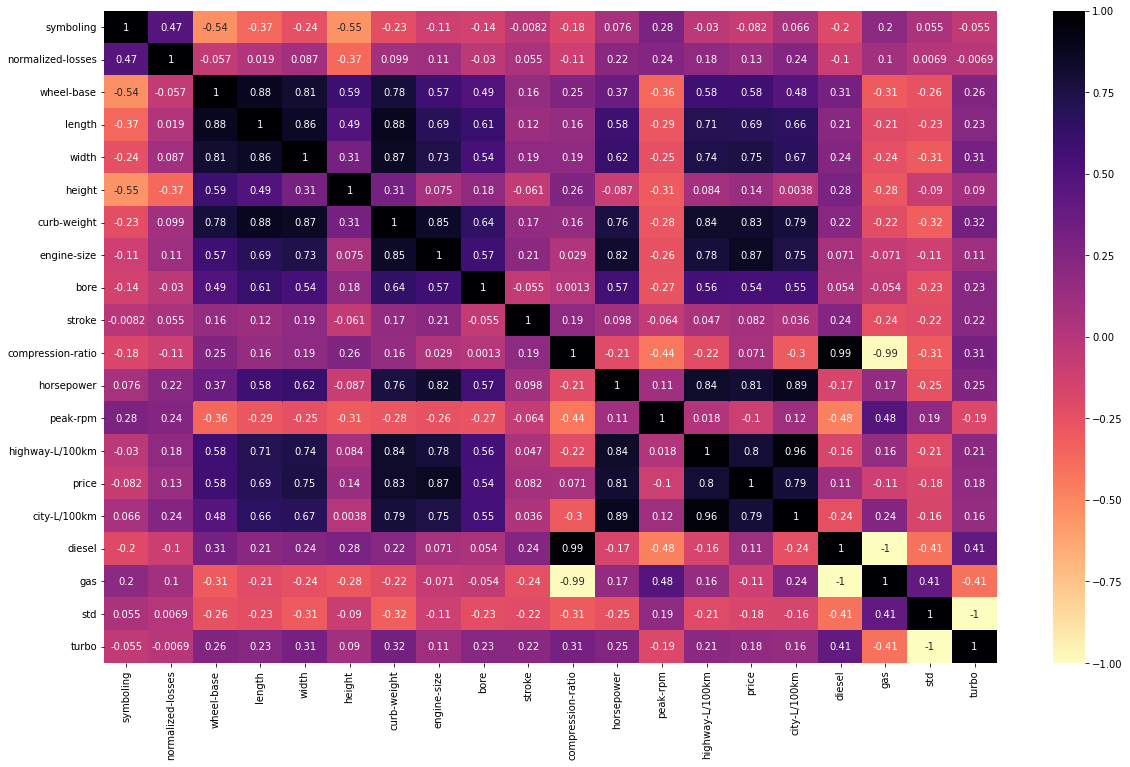

In [74]:
plt.figure(figsize = (20,12))
sns.heatmap(df.corr(), cmap ='magma_r', annot = True);

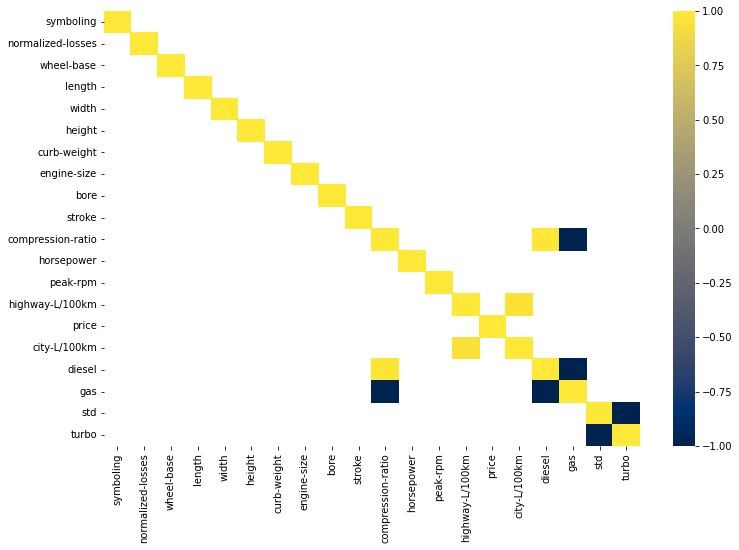

In [75]:
corr = df.corr()
corr_top = corr[abs(corr)>=.9]
plt.figure(figsize=(12,8))
sns.heatmap(corr_top, cmap="cividis")

In [76]:
# Write your code below and press Shift+Enter to execute 
df[['bore','engine-size','height', 'wheel-base','diesel','gas','horsepower','highway-L/100km', 'normalized-losses','price']].corr()

,bore,engine-size,height,wheel-base,diesel,gas,horsepower,highway-L/100km,normalized-losses,price
bore,1.000000,0.572609,0.180449,0.493244,0.054458,-0.054458,0.566903,0.559112,-0.029862,0.543155
engine-size,0.572609,1.000000,0.074694,0.572027,0.070779,-0.070779,0.822668,0.783465,0.112360,0.872335
height,0.180449,0.074694,1.000000,0.590742,0.281578,-0.281578,-0.087001,0.084301,-0.373737,0.135486
wheel-base,0.493244,0.572027,0.590742,1.000000,0.307237,-0.307237,0.371178,0.577576,-0.056661,0.584642
diesel,0.054458,0.070779,0.281578,0.307237,1.000000,-1.000000,-0.169030,-0.158091,-0.101546,0.110326
gas,-0.054458,-0.070779,-0.281578,-0.307237,-1.000000,1.000000,0.169030,0.158091,0.101546,-0.110326
horsepower,0.566903,0.822668,-0.087001,0.371178,-0.169030,0.169030,1.000000,0.840627,0.217300,0.809607
highway-L/100km,0.559112,0.783465,0.084301,0.577576,-0.158091,0.158091,0.840627,1.000000,0.181189,0.801118
normalized-losses,-0.029862,0.112360,-0.373737,-0.056661,-0.101546,0.101546,0.217300,0.181189,1.000000,0.133999
price,0.543155,0.872335,0.135486,0.584642,0.110326,-0.110326,0.809607,0.801118,0.133999,1.000000


<b>P-value</b>: 
<p>Sometimes it is important to know the significance of the correlation estimate.The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.</p>

By convention, when the
<ul>
    <li>p-value is $<$ 0.001: we say there is strong evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.05: there is moderate evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.1: there is weak evidence that the correlation is significant.</li>
    <li>the p-value is $>$ 0.1: there is no evidence that the correlation is significant.</li>
</ul>

This information is obtained using "stats" module in the "scipy" library.

In [77]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.584641822265508  with a P-value of P = 8.076488270733218e-20


**Conclusion:**
Since the p-value is  <  0.001, the correlation between wheel-base and price is statistically significant, although the linear relationship isn't extremely strong (~0.585)

In [78]:
pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value) 

The Pearson Correlation Coefficient is 0.8096068016571054  with a P-value of P =  6.273536270650504e-48


**Conclusion:**
Since the p-value is  <  0.001, the correlation between horsepower and price is statistically significant, and the linear relationship is quite strong (~0.809, close to 1)

In [79]:
pearson_coef, p_value = stats.pearsonr(df['length'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.6906283804483639  with a P-value of P =  8.016477466159328e-30


**Conclusion:**
Since the p-value is  <  0.001, the correlation between length and price is statistically significant, and the linear relationship is moderately strong (~0.691).

In [80]:
pearson_coef, p_value = stats.pearsonr(df['width'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value )

The Pearson Correlation Coefficient is 0.7512653440522673  with a P-value of P = 9.200335510481646e-38


**Conclusion:**
Since the p-value is < 0.001, the correlation between width and price is statistically significant, and the linear relationship is quite strong (~0.751).

In [81]:
pearson_coef, p_value = stats.pearsonr(df['curb-weight'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.8344145257702843  with a P-value of P =  2.189577238894065e-53


**Conclusion:**
Since the p-value is  <  0.001, the correlation between curb-weight and price is statistically significant, and the linear relationship is quite strong (~0.834).

In [82]:
pearson_coef, p_value = stats.pearsonr(df['engine-size'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.8723351674455185  with a P-value of P = 9.265491622198389e-64


**Conclusion:**
Since the p-value is  <  0.001, the correlation between engine-size and price is statistically significant, and the linear relationship is very strong (~0.872).

In [83]:
pearson_coef, p_value = stats.pearsonr(df['bore'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =  ", p_value ) 

The Pearson Correlation Coefficient is 0.5431553832626602  with a P-value of P =   8.049189483935489e-17


**Conclusion:**
Since the p-value is  <  0.001, the correlation between bore and price is statistically significant, but the linear relationship is only moderate (~0.521).

In [84]:
pearson_coef, p_value = stats.pearsonr(df['city-L/100km'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.7898975136626943  with a P-value of P =  3.903106400939802e-44


**Conclusion:**
Since the p-value is  <  0.001, the correlation between city-L/100km and price is statistically significant, and the coefficient of ~ 0.78 shows that the relationship is positive and moderately strong.

In [85]:
pearson_coef, p_value = stats.pearsonr(df['highway-L/100km'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value ) 

The Pearson Correlation Coefficient is 0.8011176263981974  with a P-value of P =  3.046784581041456e-46


**Conclusion:**
Since the p-value is < 0.001, the correlation between highway-L/100km and price is statistically significant, and the coefficient of ~ 0.801 shows that the relationship is positive and moderately strong.

### **ANOVA: Analysis of Variance**
<p>The Analysis of Variance  (ANOVA) is a statistical method used to test whether there are significant differences between the means of two or more groups. ANOVA returns two parameters:</p>

<p><b>F-test score</b>: ANOVA assumes the means of all groups are the same, calculates how much the actual means deviate from the assumption, and reports it as the F-test score. A larger score means there is a larger difference between the means.</p>

<p><b>P-value</b>:  P-value tells how statistically significant is our calculated score value.</p>

<p>If our price variable is strongly correlated with the variable we are analyzing, expect ANOVA to return a sizeable F-test score and a small p-value.</p>

Use the function 'f_oneway' in the module 'stats' to obtain the F-test score and P-value.

In [86]:
# ANOVA
stats.f_oneway(df['price'][df['drive-wheels'] == 'fwd'],
               df['price'][df['drive-wheels'] == 'rwd'],
               df['price'][df['drive-wheels'] == '4wd'])

F_onewayResult(statistic=67.95406500780399, pvalue=3.3945443577151245e-23)

This is a great result, with a large F test score showing a strong correlation and a P value of almost 0 implying almost certain statistical significance. But does this mean all three tested groups are all this highly correlated?

**Separately: fwd and rwd**

In [87]:
stats.f_oneway(df['price'][df['drive-wheels'] == 'fwd'],
               df['price'][df['drive-wheels'] == 'rwd'])

F_onewayResult(statistic=130.5533160959111, pvalue=2.2355306355677845e-23)

**fwd and 4wd**

In [88]:
stats.f_oneway(df['price'][df['drive-wheels'] == 'fwd'],
               df['price'][df['drive-wheels'] == '4wd'])

F_onewayResult(statistic=0.6654657502523033, pvalue=0.41620116697845666)

**rwd and 4wd**

In [89]:
stats.f_oneway(df['price'][df['drive-wheels'] == 'rwd'],
               df['price'][df['drive-wheels'] == '4wd'])

F_onewayResult(statistic=8.580681368924756, pvalue=0.004411492211225333)

### **Data Visualization**
Visualization is very important in data science, and Python visualization packages provide great freedom. 

The main question to be answered in this module, is "What are the main characteristics which have the most impact on the car price?".

To get a better measure of the important characteristics, look at the correlation of these variables with the car price, in other words: how is the car price dependent on this variable?

#### **Data Visualization of Continuous numerical variables:**
Continuous numerical variables are variables that may contain any value within some range. Continuous numerical variables can have the type "int64" or "float64". A great way to visualize these variables is by using scatterplots with fitted lines.

In order to start understanding the (linear) relationship between an individual variable and the price use "regplot", which plots the scatterplot plus the fitted regression line for the data.

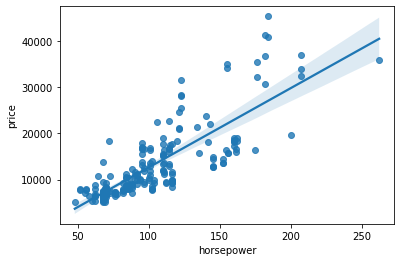

In [90]:
# Horsepower as potential predictor variable of price
sns.regplot(x="horsepower", y="price", data=df);

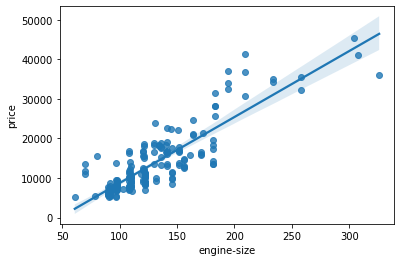

In [91]:
# Engine size as potential predictor variable of price
sns.regplot(x="engine-size", y="price", data=df);

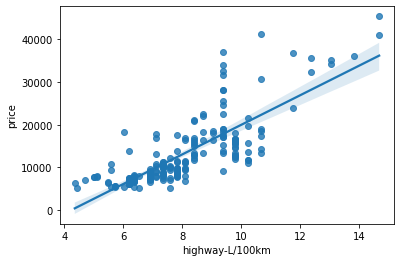

In [92]:
# Engine size as potential predictor variable of price
sns.regplot(x="highway-L/100km", y="price", data=df);

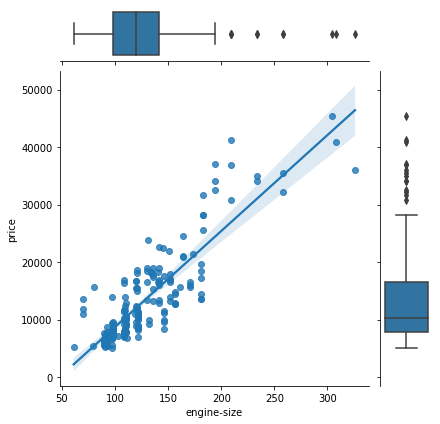

In [93]:
g = sns.JointGrid(x="engine-size", y="price", data=df)
g = g.plot(sns.regplot, sns.boxplot)

#### **Data Visualization of Categorical variables**

<p>These are variables that describe a 'characteristic' of a data unit, and are selected from a small group of categories. The categorical variables can have the type "object" or "int64". A good way to visualize categorical variables is by using boxplots.</p>

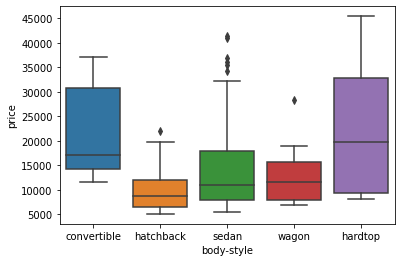

In [94]:
sns.boxplot(x="body-style", y="price", data=df);

<p>The distributions of price between the different body-style categories have a significant overlap, and so body-style would not be a good predictor of price. Consider "engine-location" and "price":</p>

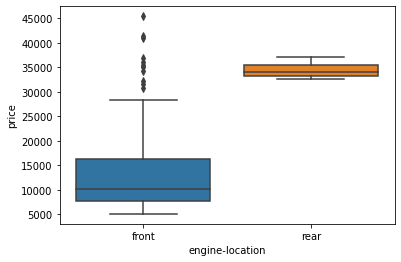

In [95]:
sns.boxplot(x="engine-location", y="price", data=df);

<p>Here it can be seen that the distribution of price between these two engine-location categories, front and rear, are distinct enough to take engine-location as a potential good predictor of price.</p>

Examine "drive-wheels" and "price".

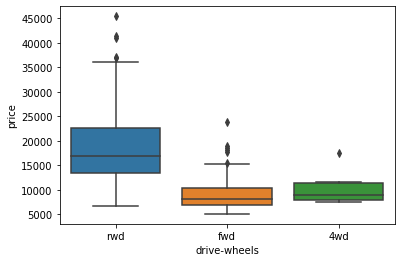

In [96]:
# drive-wheels and price
sns.boxplot(x="drive-wheels", y="price", data=df)

Here it is observed that the distribution of price between the different drive-wheels categories differs; as such drive-wheels could potentially be a predictor of price.

### **Conclusion: Important Variables**
It is clear how the data looks like and which variables are important to take into account when predicting the car price. The following variables seem good predictors of the car price:
<p><b>Continuous numerical variables:</b></p>
<ul>
    <li>Length</li>
    <li>Width</li>
    <li>Curb-weight</li>
    <li>Engine-size</li>
    <li>Horsepower</li>
    <li>City-L/100km</li>
    <li>highway-L/100km</li>
    <li>Wheel-base</li>
    <li>Bore</li>
</ul>
    
<b>Categorical variables:</b>
<ul>
    <li>Drive-wheels</li>
</ul>

<p>As we now move into building machine learning models to automate our analysis, feeding the model with variables that meaningfully affect our target variable will improve our model's prediction performance.</p>

## **Model Development**<a name="Development"></a>
Model Development is used to predict future observations from the past data. A Model is used to understand the exact relationship between different variables and how these variables are used to predict the result.

### **Simple Linear Regression**
Simple Linear Regression is a method to understand the relationship between two variables:

* The predictor/independent variable (X)
* The response/dependent variable (that we want to predict)(Y)

The result of Linear Regression is a linear function that predicts the response (dependent) variable as a function of the predictor (independent) variable.

$$
 Y: Response \ Variable\\
 X: Predictor \ Variables
$$

<b>Linear function:</b>
$$
Yhat = a + b  X
$$
<ul>
    <li>a refers to the <b>intercept</b> of the regression line0, in other words: the value of Y when X is 0</li>
    <li>b refers to the <b>slope</b> of the regression line, in other words: the value with which Y changes when X increases by 1 unit</li>
</ul>

#### **Building the Linear Regression Model**

In [97]:
#Load the modules for linear regression
from sklearn.linear_model import LinearRegression
#Create the linear regression object
lm = LinearRegression()

##### **Project 1**
How could Highway-L/100km helps to predict car price?

Using simple linear regression, create a linear function with "highway-L/100km" as the predictor variable and the "price" as the response variable.

In [98]:
X = df[['highway-L/100km']]
Y = df['price']
#Fit the linear model using highway-L/100km.
lm.fit(X,Y)
#Prediction on unknown
Yhat=lm.predict(X)
print(Y[0:5])
print(Y[0:5].values)
print(Yhat[0:5].round(0))

0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: price, dtype: float64
[13495. 16500. 16500. 13950. 17450.]
[15486. 15486. 16643. 12475. 22327.]


In [99]:
#The value of the intercept (a)
print(lm.intercept_)
#The value of the Slope (b)
print(lm.coef_)

-14617.843054664605
[3458.68511314]


What is the final estimated linear model obtained for the relation between highway-L/100km and price?

A final linear model with the structure should be obtained:
$$
Yhat = a + b  X
$$

Plugging in the actual values to obtain the linear function. 
<p><b>price</b> = -14617.843 + 3458.685  x  <b>highway-L/100km</b><p>

##### **Project 2**
Train the model using 'engine-size' as the independent variable and 'price' as the dependent variable

Using simple linear regression, create a linear function with "engine-size" as the predictor variable and the "price" as the response variable.

In [100]:
x_lm = df[['engine-size']]
Y = df['price']
#Fit the linear model using engine-size.
lm.fit(x_lm,Y)
#Prediction on unknown
Yhat_lm=lm.predict(x_lm)
print(Y[0:5])
print('\n',"Actual value of price of car is:" '\n',Y[0:5].values )
print("Predicted value of price against engine size is:",'\n',Yhat_lm[0:5].round(0))

#The value of the intercept (a)
print('\n',"Intercept (a) of linear function with 'engine-size' as the predictor variable and the 'price' as the response variable is:", lm.intercept_.round(2))
#The value of the Slope (b)
print('\n',"Slope (b) of linear function with 'engine-size' as the predictor variable and the 'price' as the response variable is:",lm.coef_.round(2))
      

0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: price, dtype: float64

 Actual value of price of car is:
 [13495. 16500. 16500. 13950. 17450.]
Predicted value of price against engine size is: 
 [13728. 13728. 17399. 10224. 14730.]

 Intercept (a) of linear function with 'engine-size' as the predictor variable and the 'price' as the response variable is: -7963.34

 Slope (b) of linear function with 'engine-size' as the predictor variable and the 'price' as the response variable is: [166.86]


The linear function of relation between engine size and price is: 
<p><b>price</b> = -7963.34 + 166.86 x <b>engine size</b> </p>

### **Multiple Linear Regression**

Multiple Linear Regression is used to predict car price using more than one variable. Multiple Linear Regression is very similar to Simple Linear Regression, but this method is used to explain the relationship between one continuous response (dependent) variable and two or more predictor (independent) variables. Most of the real-world regression models involve multiple predictors. 

The equation is given by: 
$$
Yhat = a + b_1 X_1 + b_2 X_2 + b_3 X_3 + b_4 X_4
$$
where, 
$$
Y: Response \ Variable\\
X_1 :Predictor\ Variable \ 1\\
X_2: Predictor\ Variable \ 2\\
X_3: Predictor\ Variable \ 3\\
X_4: Predictor\ Variable \ 4\\
$$

$$
a: intercept\\
b_1 :coefficients \ of\ Variable \ 1\\
b_2: coefficients \ of\ Variable \ 2\\
b_3: coefficients \ of\ Variable \ 3\\
b_4: coefficients \ of\ Variable \ 4\\
$$

#### **Building a Multiple Linear Regression Model**
Develop a model using the good variables obtained from the preprocessing and exploratory section as the predictor variables.
<ul>
    <li>Horsepower</li>
    <li>Curb-weight</li>
    <li>Engine-size</li>
    <li>Highway-mpg</li>
</ul>

In [101]:
X = df[['horsepower', 'curb-weight', 'engine-size', 'highway-L/100km']]
Y = df['price']
mlr = LinearRegression()
#Fit the linear model using highway-L/100km.
mlr.fit(X,Y)
#Prediction on unknown
Y_pred=mlr.predict(X)
print(Y[0:5])
print('\n',"Actual value of price of car is:" '\n',Y[0:5].values )
print("Predicted value of price against 'horsepower', 'curb-weight', 'engine-size', 'highway-L/100km' is:",'\n',Yhat[0:5].round(0))

#The value of the intercept (a)
print('\n',"Intercept (a) of linear function with 'horsepower', 'curb-weight', 'engine-size', 'highway-L/100km' as the predictor variables and the 'price' as the response variable is:", mlr.intercept_.round(2))
#The value of the Slopes (b1, b2, b3, b4)
print('\n',"Slope (b) of linear function with 'horsepower', 'curb-weight', 'engine-size', 'highway-L/100km' as the predictor variables and the 'price' as the response variable is:",mlr.coef_.round(2))
pd.DataFrame(mlr.coef_, X.columns, columns = ["Coefficient"])

0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: price, dtype: float64

 Actual value of price of car is:
 [13495. 16500. 16500. 13950. 17450.]
Predicted value of price against 'horsepower', 'curb-weight', 'engine-size', 'highway-L/100km' is: 
 [15486. 15486. 16643. 12475. 22327.]

 Intercept (a) of linear function with 'horsepower', 'curb-weight', 'engine-size', 'highway-L/100km' as the predictor variables and the 'price' as the response variable is: -14385.63

 Slope (b) of linear function with 'horsepower', 'curb-weight', 'engine-size', 'highway-L/100km' as the predictor variables and the 'price' as the response variable is: [ 36.64   3.5   85.37 500.52]


,Coefficient
horsepower,36.637737
curb-weight,3.500382
engine-size,85.373709
highway-L/100km,500.519798


A final linear function should be with the structure:

$$
Yhat = a + b_1 X_1 + b_2 X_2 + b_3 X_3 + b_4 X_4
$$
Final estimated multiple linear function model is: 
<p><b>price</b> = -14385.63 + 36.64 x <b>horsepower</b> + 3.5 x <b>curb-weight</b> + 85.37 x <b>engine-size</b> + 500.52 x <b>highway-L/100km</b></p>

#### **Plot to display deviations from perfect prediction**

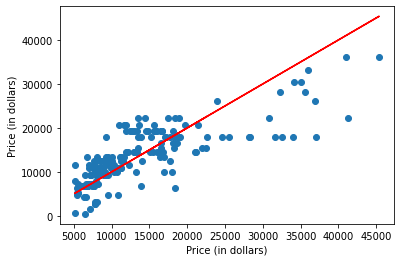

In [102]:
 # Final predictions
plt.scatter(Y,Yhat)

# Perfect predictions
plt.xlabel('Price (in dollars)')
plt.ylabel('Price (in dollars)')
plt.plot(Y,Y,'r');

Use the method ".corr()" to verify the model.

In [103]:
df[['horsepower', 'curb-weight', 'engine-size', 'highway-L/100km', 'price']].corr()

,horsepower,curb-weight,engine-size,highway-L/100km,price
horsepower,1.000000,0.757981,0.822668,0.840627,0.809607
curb-weight,0.757981,1.000000,0.849072,0.836921,0.834415
engine-size,0.822668,0.849072,1.000000,0.783465,0.872335
highway-L/100km,0.840627,0.836921,0.783465,1.000000,0.801118
price,0.809607,0.834415,0.872335,0.801118,1.000000


<h4>Residual Plot</h4>

<p>A good way to visualize the variance of the data is to use a residual plot.</p>

<p>What is a <b>residual</b>?</p>

<p>The difference between the observed value (y) and the predicted value (Yhat) is called the residual (e). When we look at a regression plot, the residual is the distance from the data point to the fitted regression line.</p>

<p>So what is a <b>residual plot</b>?</p>

<p>A residual plot is a graph that shows the residuals on the vertical y-axis and the independent variable on the horizontal x-axis.</p>

<p>What do we pay attention to when looking at a residual plot?</p>

<p>We look at the spread of the residuals:</p>

<p>- If the points in a residual plot are <b>randomly spread out around the x-axis</b>, then a <b>linear model is appropriate</b> for the data. Why is that? Randomly spread out residuals means that the variance is constant, and thus the linear model is a good fit for this data.</p>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


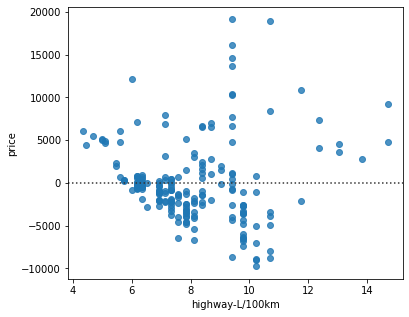

In [104]:
plt.figure(figsize=((6,5)))
sns.residplot(df['highway-L/100km'], df['price'])
plt.show();

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


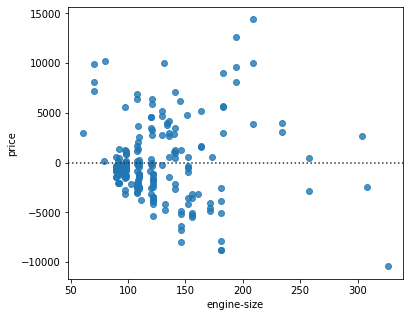

In [105]:
plt.figure(figsize=((6,5)))
sns.residplot(df['engine-size'], df['price'])
plt.show();

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


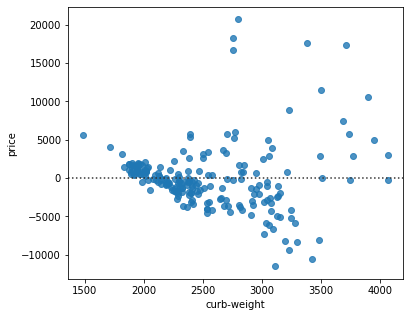

In [106]:
plt.figure(figsize=((6,5)))
sns.residplot(df['curb-weight'], df['price'])
plt.show();

The residual plot shows that the residuals are not randomly spread around the x-axis, which infers that maybe a non-linear model is more appropriate for this data.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


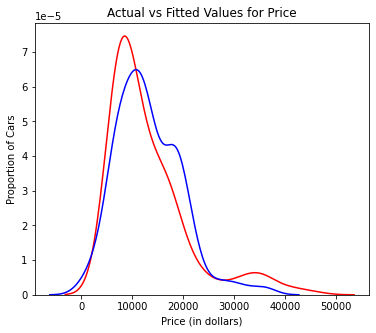

In [107]:
plt.figure(figsize=(6,5))

ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show();

The fitted values are reasonably close to the actual values, since the two distributions overlap a bit. However, there is definitely some room for improvement.

### **Polynomial Regression and Pipelines**
Polynomial regression is a particular case of the general linear regression model or multiple linear regression models.

A non-linear relationships is obtained by squaring or setting higher-order terms of the predictor variables.

There are different orders of polynomial regression:
<center><b>Quadratic - 2nd order</b></center>
$$
Yhat = a + b_1 X^2 +b_2 X^2 
$$


<center><b>Cubic - 3rd order</b></center>
$$
Yhat = a + b_1 X^2 +b_2 X^2 +b_3 X^3\\
$$


<center><b>Higher order</b>:</center>
$$
Y = a + b_1 X^2 +b_2 X^2 +b_3 X^3 ....\\
$$

In [108]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 350, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

            4           3         2
-7.946e-05 x + 0.04265 x - 7.611 x + 698.1 x - 1.631e+04


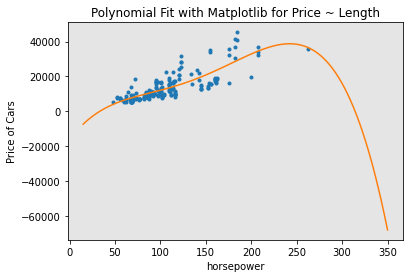

In [109]:
x = df['horsepower']
y = df['price']
#using a polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 4)
p = np.poly1d(f)
print(p)
PlotPolly(p, x, y, 'horsepower')

            4            3         2
-8.664e-07 x - 0.006004 x + 3.482 x - 416 x + 2.144e+04


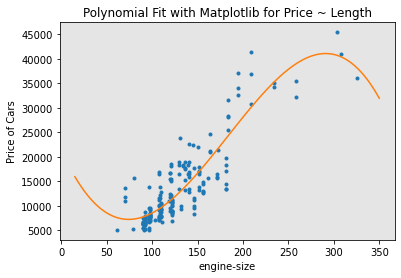

In [110]:
x = df['engine-size']
y = df['price']
#using a polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 4)
p = np.poly1d(f)
print(p)
PlotPolly(p, x, y, 'engine-size')

In [111]:
np.polyfit(x, y, 3)

array([-6.64112463e-03,  3.64536744e+00, -4.33383781e+02,  2.20846740e+04])

It is seen from plotting that this polynomial model performs better than the linear model. This is because the generated polynomial function "hits" more of the data points.

<p>The analytical expression for Multivariate Polynomial function gets complicated. For example, the expression for a second-order (degree=2)polynomial with two variables is given by:</p>
$$
Yhat = a + b_1 X_1 +b_2 X_2 +b_3 X_1 X_2+b_4 X_1^2+b_5 X_2^2
$$

In [112]:
# Perform a polynomial transform on multiple features
from sklearn.preprocessing import PolynomialFeatures
#create a PolynomialFeatures object of degree 2:
pr=PolynomialFeatures(degree=2)
X_pr=pr.fit_transform(X)

The original data is of 201 samples and 4 features

In [113]:
print(X.shape)
print(X_pr.shape)

(201, 4)
(201, 15)


After the transformation, there 201 samples and 15 features

#### **Building Polynomial Linear Regression Model**

In [114]:
plm = LinearRegression()
X = df[['horsepower', 'curb-weight', 'engine-size', 'highway-L/100km']]
Y = df['price']

#Fit the linear model using X_pr.
plm.fit(X_pr,Y)
#Prediction on unknown
Y_pred_poly=plm.predict(X_pr)
print(Y[0:5])
print('\n',"Actual value of price of car is:" '\n',Y[0:5].values )
print("Predicted value of price against 'horsepower', 'curb-weight', 'engine-size', 'highway-L/100km' is:",'\n',Y_pred_poly[0:5].round(0))

#The value of the intercept (a)
print('\n',"Intercept (a) of linear function with 'horsepower', 'curb-weight', 'engine-size', 'highway-L/100km' as the predictor variables and the 'price' as the response variable is:", plm.intercept_.round(2))
#The value of the Slopes (b1, b2, b3, b4)
print('\n',"Slope (b) of linear function with 'horsepower', 'curb-weight', 'engine-size', 'highway-L/100km' as the predictor variables and the 'price' as the response variable is:",plm.coef_.round(2))
#pd.DataFrame(plm.coef_, X.columns, columns = ["Coefficient"])

0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: price, dtype: float64

 Actual value of price of car is:
 [13495. 16500. 16500. 13950. 17450.]
Predicted value of price against 'horsepower', 'curb-weight', 'engine-size', 'highway-L/100km' is: 
 [12396. 12396. 18422.  9980. 17552.]

 Intercept (a) of linear function with 'horsepower', 'curb-weight', 'engine-size', 'highway-L/100km' as the predictor variables and the 'price' as the response variable is: 9589.46

 Slope (b) of linear function with 'horsepower', 'curb-weight', 'engine-size', 'highway-L/100km' as the predictor variables and the 'price' as the response variable is: [ 0.00000e+00  3.12620e+02 -3.23000e+00 -4.13200e+01 -4.66042e+03
  1.94000e+00 -5.00000e-02 -6.50000e-01 -5.56500e+01  0.00000e+00
  9.00000e-02 -1.08000e+00 -2.30000e-01 -2.90000e-01  8.24070e+02]


#### **Pipeline for Polynomial Regression**
Data Pipelines simplify the steps of processing the data. Use the module Pipeline to create a pipeline. Also use StandardScaler as a step in this pipeline.

In [115]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [116]:
#Create the pipeline, by creating a list of tuples including the name of the model or estimator and its corresponding constructor.
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

#input the list as an argument to the pipeline constructor
#This can normalize the data, perform a transform and fit the model simultaneously.
pipe_plr=Pipeline(Input)
pipe_plr

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [117]:
X = df[['horsepower', 'curb-weight', 'engine-size', 'highway-L/100km']]
y = df['price']
pipe_plr.fit(X,y)
y_pred_plr=pipe_plr.predict(X)
y_pred_plr[0:4]
print('\n',"Actual value of price of car is:" '\n',y[0:5].values )
print("Predicted value of price against 'horsepower', 'curb-weight', 'engine-size', 'highway-L/100km'using Polynomial Linear function is:",'\n',y_pred_plr[0:5].round(0))


 Actual value of price of car is:
 [13495. 16500. 16500. 13950. 17450.]
Predicted value of price against 'horsepower', 'curb-weight', 'engine-size', 'highway-L/100km'using Polynomial Linear function is: 
 [12396. 12396. 18422.  9980. 17552.]


Create a pipeline that Standardizes the data, then perform prediction using a linear regression model using the features X and targets y

In [118]:
#Create the pipeline, by creating a list of tuples including the name of the model or estimator and its corresponding constructor.
Input=[('scale',StandardScaler()), ('model',LinearRegression())]

#input the list as an argument to the pipeline constructor
#This can normalize the data, perform a transform and fit the model simultaneously.
pipe_mlr=Pipeline(Input)
pipe_mlr

Pipeline(steps=[('scale', StandardScaler()), ('model', LinearRegression())])

In [119]:
X = df[['horsepower', 'curb-weight', 'engine-size', 'highway-L/100km']]
y = df['price']
pipe_mlr.fit(X,y)
y_pred_mlr=pipe_mlr.predict(X)
y_pred_mlr[0:4]
print('\n',"Actual value of price of car is:" '\n',y[0:5].values )
print("Predicted value of price against 'horsepower', 'curb-weight', 'engine-size', 'highway-L/100km' using Linear Regression function is:",'\n',y_pred_mlr[0:5].round(0))


 Actual value of price of car is:
 [13495. 16500. 16500. 13950. 17450.]
Predicted value of price against 'horsepower', 'curb-weight', 'engine-size', 'highway-L/100km' using Linear Regression function is: 
 [14055. 14055. 18639. 10758. 16670.]


## **Model Evaluation**<a name="Evaluation"></a>
<p>Two very important measures that are often used in Statistics to determine the accuracy of a model are:</p>
<ul>
    <li><b>R^2 / R-squared</b></li>
    <li><b>Mean Squared Error (MSE)</b></li>
</ul>
    
<b>R-squared</b>

<p>R squared, also known as the coefficient of determination, is a measure to indicate how close the data is to the fitted regression line.</p>
    
<p>The value of the R-squared is the percentage of variation of the response variable (y) that is explained by a linear model.</p>



<b>Mean Squared Error (MSE)</b>

<p>The Mean Squared Error measures the average of the squares of errors, that is, the difference between actual value (y) and the estimated value (ŷ).</p>

In [120]:
x_lm.shape

(201, 1)

In [121]:
k = x_lm.shape[1]
n = len(x_lm)
n

from sklearn import metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score, r2_score
print('Mean Absolute Error(MAE) of Simple Linear regression:', metrics.mean_absolute_error(y, Yhat_lm))
print('Mean Squared Error(MSE) of Simple Linear regression:', metrics.mean_squared_error(y, Yhat_lm))
print('Root Mean Squared Error (RMSE) of Simple Linear regression:', np.sqrt(metrics.mean_squared_error(y, Yhat_lm)))
print('Explained Variance Score (EVS) of Simple Linear regression:',explained_variance_score(y, Yhat_lm))
print('R2 of Simple Linear regression:',metrics.r2_score(y, Yhat_lm))
print('R2 rounded of Simple Linear regression:',(metrics.r2_score(y, Yhat_lm)).round(2))
r2 = r2_score(y, Yhat_lm)
r2_rounded = r2_score(y, Yhat_lm).round(2)
adjusted_r2 = (1- (1-r2)*(n-1)/(n-k-1)).round(3)
print('Adjusted_r2 of Simple Linear regression: ', (1- (1-r2)*(n-1)/(n-k-1)).round(3))
accuracy = lm.score(x_lm, y)
print("Accuracy of Simple Linear regression: {}".format(accuracy))


Mean Absolute Error(MAE) of Simple Linear regression: 2795.449760620882
Mean Squared Error(MSE) of Simple Linear regression: 15021126.025174143
Root Mean Squared Error (RMSE) of Simple Linear regression: 3875.709744701497
Explained Variance Score (EVS) of Simple Linear regression: 0.7609686443622008
R2 of Simple Linear regression: 0.7609686443622008
R2 rounded of Simple Linear regression: 0.76
Adjusted_r2 of Simple Linear regression:  0.76
Accuracy of Simple Linear regression: 0.7609686443622008


In [122]:
k = X.shape[1]
k
n = len(X)
n

from sklearn import metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score, r2_score
print('Mean Absolute Error(MAE) of Multiple Linear regression:', metrics.mean_absolute_error(y, y_pred_mlr))
print('Mean Squared Error(MSE) of Multiple Linear regression:', metrics.mean_squared_error(y, y_pred_mlr))
print('Root Mean Squared Error (RMSE) of Multiple Linear regression:', np.sqrt(metrics.mean_squared_error(y, y_pred_mlr)))
print('Explained Variance Score (EVS) of Multiple Linear regression:',explained_variance_score(y, y_pred_mlr))
print('R2 of Multiple Linear regression:',metrics.r2_score(y, y_pred_mlr))
print('R2 rounded of Multiple Linear regression:',(metrics.r2_score(y, y_pred_mlr)).round(2))
r2 = r2_score(y, y_pred_mlr)
r2_rounded = r2_score(y, y_pred_mlr).round(2)
adjusted_r2 = (1- (1-r2)*(n-1)/(n-k-1)).round(3)
print('Adjusted_r2 of Multiple Linear regression: ', (1- (1-r2)*(n-1)/(n-k-1)).round(3))
accuracy = mlr.score(X, Y)
print("Accuracy of Multiple Linear regression: {}".format(accuracy))

Mean Absolute Error(MAE) of Multiple Linear regression: 2436.3426227595114
Mean Squared Error(MSE) of Multiple Linear regression: 11826072.956532085
Root Mean Squared Error (RMSE) of Multiple Linear regression: 3438.9057789552894
Explained Variance Score (EVS) of Multiple Linear regression: 0.811811561534475
R2 of Multiple Linear regression: 0.811811561534475
R2 rounded of Multiple Linear regression: 0.81
Adjusted_r2 of Multiple Linear regression:  0.808
Accuracy of Multiple Linear regression: 0.811811561534475


In [123]:
k = X_pr.shape[1]
k
n = len(X_pr)
n

from sklearn import metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score, r2_score
print('Mean Absolute Error(MAE) of Polynomial Linear regression:', metrics.mean_absolute_error(y, y_pred_plr))
print('Mean Squared Error(MSE) of Polynomial Linear regression:', metrics.mean_squared_error(y, y_pred_plr))
print('Root Mean Squared Error (RMSE) of Polynomial Linear regression:', np.sqrt(metrics.mean_squared_error(y, y_pred_plr)))
print('Explained Variance Score (EVS) of Polynomial Linear regression:',explained_variance_score(y, y_pred_plr))
print('R2 of Polynomial Linear regression:',metrics.r2_score(y, y_pred_plr))
print('R2 rounded of Polynomial Linear regression:',(metrics.r2_score(y, y_pred_plr)).round(2))
r2 = r2_score(y, y_pred_plr)
r2_rounded = r2_score(y, y_pred_plr).round(2)
adjusted_r2 = (1- (1-r2)*(n-1)/(n-k-1)).round(3)
print('Adjusted_r2 of Polynomial Linear regression: ', (1- (1-r2)*(n-1)/(n-k-1)).round(3))
accuracy = plm.score(X_pr, y)
print("Accuracy of Polynomial Linear regression: {}".format(accuracy))

Mean Absolute Error(MAE) of Polynomial Linear regression: 2116.6587061185933
Mean Squared Error(MSE) of Polynomial Linear regression: 9231051.281461732
Root Mean Squared Error (RMSE) of Polynomial Linear regression: 3038.2645180204
Explained Variance Score (EVS) of Polynomial Linear regression: 0.8531061720624729
R2 of Polynomial Linear regression: 0.8531061720624729
R2 rounded of Polynomial Linear regression: 0.85
Adjusted_r2 of Polynomial Linear regression:  0.841
Accuracy of Polynomial Linear regression: 0.853106172062473


### **Decision Making: Determining a Good Model Fit**

<p>Now that the different models have been visualized, and the R-squared and MSE values for the fits are also generated, how can a good model fit be determined?
<ul>
    <li><i>What is a good R-squared value?</i></li>
</ul>
</p>

<p>When comparing models, <b>the model with the higher R-squared value is a better fit</b> for the data.
<ul>
    <li><i>What is a good MSE?</i></li>
</ul>
</p>

<p>When comparing models, <b>the model with the smallest MSE value is a better fit</b> for the data.</p>


<h4>Take a look at the values for the different models.</h4>
<p>Simple Linear Regression: Using engine-size as a Predictor Variable of Price.
<ul>
    <li>R-squared: 0.76</li>
    <li>MSE: 15021126.02</li>
</ul>
</p>
<p>Multiple Linear Regression: Using Horsepower, Curb-weight, Engine-size, and Highway-mpg as Predictor Variables of Price.
<ul>
    <li>R-squared: 0.81</li>
    <li>MSE: 11826072.96</li>
</ul>
</p>
    
<p>Polynomial Fit: Using Highway-mpg as a Predictor Variable of Price.
<ul>
    <li>R-squared: 0.85</li>
    <li>MSE: 9231051.28</li>
</ul>
</p>

From the R2 values obtained above, it can be inferred that, 
<p>76% of the variation of price is explained by this multiple linear regression</p>
<p>81% of the variation of price is explained by this multiple linear regression</p>
<p>85% of the variation of price is explained by this Polynomial linear regression</p>

of the three models compared, Polynomial Linear Regression with the highest R- squared score and least MSE seems the best fit model.  

### **Conclusion:**
Comparing these three models, it can be concluded that the PLR model is the best model to be able to predict price from the current dataset. This result makes sense, since we have 27 variables in total and their powers, and that more than one of those variables are potential predictors of the final car price.